In [ ]:
pip install pandas

1. Dataset Selection and Justification
Chosen Dataset:
📊 Heart Disease UCI Dataset
(Source: Kaggle - Heart Disease UCI)

Why it fits:

✅ 14 attributes (age, sex, chest pain type, cholesterol, etc.)

✅ 303 records

✅ Focused on healthcare, a practical and high-impact domain

✅ Balanced in terms of classification target (presence or absence of heart disease)

✅ Requires real-world preprocessing (missing values, encoding, scaling)



2. Load Dataset & Inspect Structure


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart.csv')

# Preview dataset
print(df.head())

# Dataset structure
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29


📌 3. Data Cleaning
🔹 a. Handle Missing Values



In [7]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Impute missing numeric values with median
df['chol'] = df['chol'].fillna(df['chol'].median())

# Option 2: Drop rows with missing values
df.dropna(inplace=True)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


b. Remove Duplicates

In [8]:
df.drop_duplicates(inplace=True)


 c. Fix Inconsistent or Noisy Data

In [10]:
# Example: Cap extreme values or remove obvious noise
import numpy as np

# Replace zero values in cholesterol where physiologically impossible
df = df[df['chol'] > 0]

# Normalize or standardize if needed in next phase


📌 4. Exploratory Data Analysis (EDA)


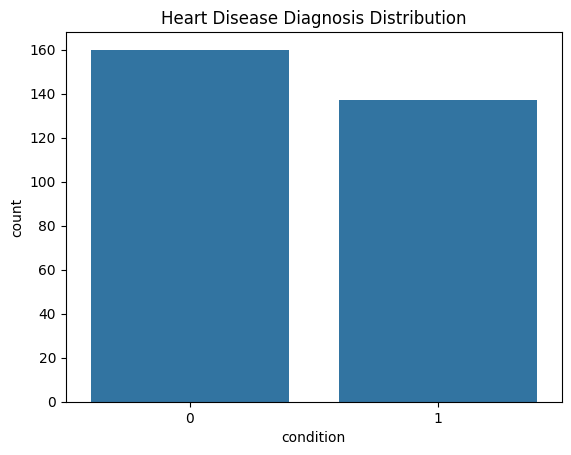

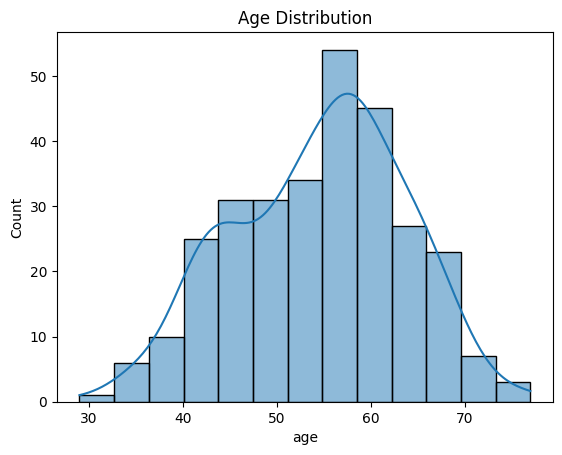

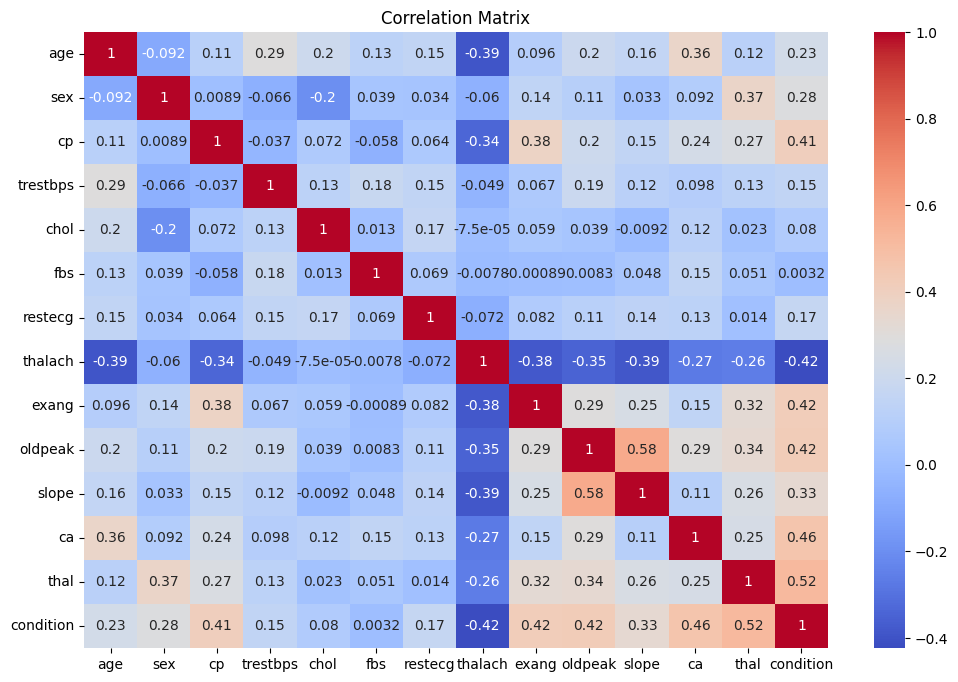

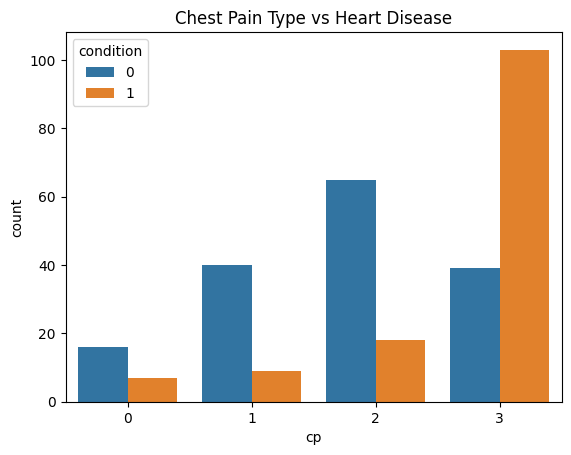

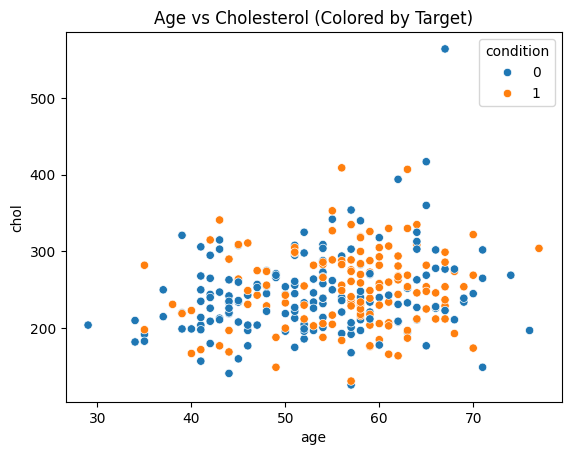

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# condition variable distribution
sns.countplot(x='condition', data=df)
plt.title("Heart Disease Diagnosis Distribution")
plt.show()

# Age distribution
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Chest pain type vs condition
sns.countplot(x='cp', hue='condition', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

# Scatter: age vs cholesterol
sns.scatterplot(x='age', y='chol', hue='condition', data=df)
plt.title("Age vs Cholesterol (Colored by Target)")
plt.show()


In [14]:
df.to_csv('heart_cleaned.csv', index=False)


Training and evaluating: Linear Regression
Cross-validated RMSE: 0.5423
Test RMSE: 0.6049
Test R^2: -0.4700

Training and evaluating: Ridge Regression
Cross-validated RMSE: 0.4110
Test RMSE: 0.5272
Test R^2: -0.1167

Training and evaluating: Lasso Regression
Cross-validated RMSE: 0.3854
Test RMSE: 0.4130
Test R^2: 0.3147



/tmp/ipython-input-1-3741703144.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_rmse_scores, palette='viridis')
/tmp/ipython-input-1-3741703144.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_r2_scores, palette='magma')


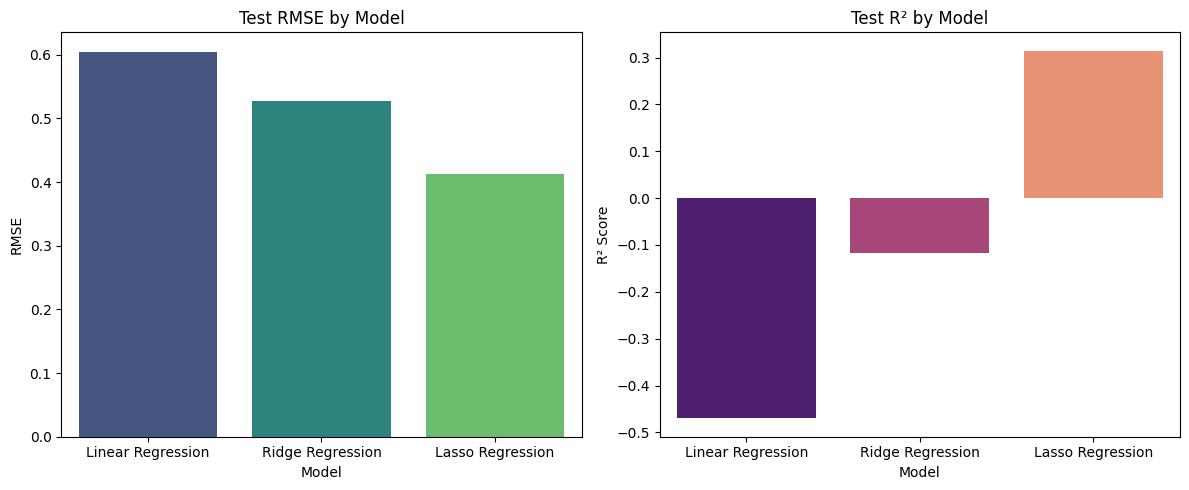

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load cleaned dataset
df = pd.read_csv('cleaned_heart.csv')  # replace with your actual cleaned data file

# 2. Define features (X) and condition (y)
X = df.drop(columns=['condition'])
y = df['condition']

# 3. Feature engineering: create polynomial features (degree=2) to capture interactions
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 4. Scale features (important for regularization models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# 5. Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Prepare lists to collect evaluation results for visualization
model_names = []
cv_rmse_scores = []
test_rmse_scores = []
test_r2_scores = []

# 7. Train, cross-validate, and evaluate models
for name, model in models.items():
    print(f"Training and evaluating: {name}")

    # Cross-validation (5-fold) using negative MSE (convert to RMSE)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()

    # Fit model on full training set
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate test RMSE and R^2
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    # Store results
    model_names.append(name)
    cv_rmse_scores.append(cv_rmse)
    test_rmse_scores.append(test_rmse)
    test_r2_scores.append(test_r2)

    # Print evaluation metrics
    print(f"Cross-validated RMSE: {cv_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test R^2: {test_r2:.4f}\n")

# 8. Visualize model performance

plt.figure(figsize=(12,5))

# RMSE comparison
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=test_rmse_scores, palette='viridis')
plt.title('Test RMSE by Model')
plt.ylabel('RMSE')
plt.xlabel('Model')

# R^2 comparison
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=test_r2_scores, palette='magma')
plt.title('Test R² by Model')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# SVM with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(probability=True)
grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X_train, y_train)
y_pred_svm = grid.predict(X_test)
y_proba_svm = grid.predict_proba(X_test)[:,1]


Decision Tree:
[[24  8]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

SVM (Best Params): {'C': 10, 'kernel': 'linear'}
[[22 10]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.68      0.75      0.71        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



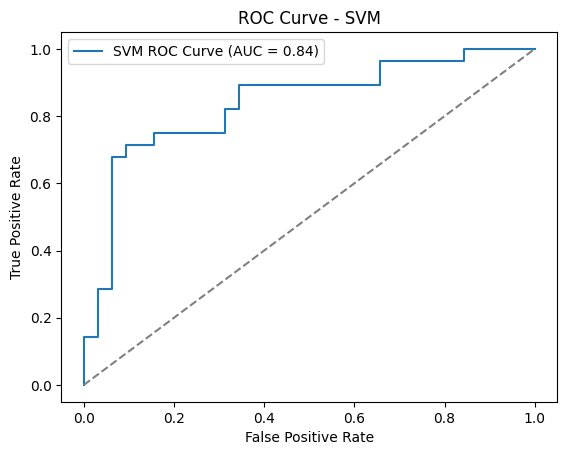

In [ ]:
# Confusion Matrix and Classification Report
print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("SVM (Best Params):", grid.best_params_)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# ROC Curve for SVM
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


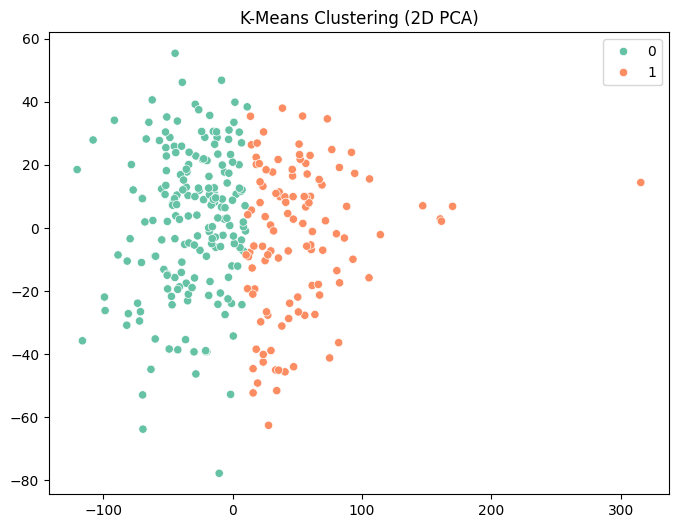

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2')
plt.title('K-Means Clustering (2D PCA)')
plt.show()


Association Rules:


,antecedents,consequents,support,confidence,lift
0,(cholesterol > 240),(age > 50),0.4,0.666667,1.111111
1,(age > 50),(cholesterol > 240),0.4,0.666667,1.111111
2,(high blood pressure),(age > 50),0.4,0.666667,1.111111
3,(age > 50),(high blood pressure),0.4,0.666667,1.111111
4,(low heart rate),(cholesterol > 240),0.2,0.500000,0.833333
5,(low heart rate),(high blood pressure),0.2,0.500000,0.833333
6,"(high blood pressure, cholesterol > 240)",(age > 50),0.2,1.000000,1.666667
7,"(high blood pressure, age > 50)",(cholesterol > 240),0.2,0.500000,0.833333
8,"(cholesterol > 240, age > 50)",(high blood pressure),0.2,0.500000,0.833333


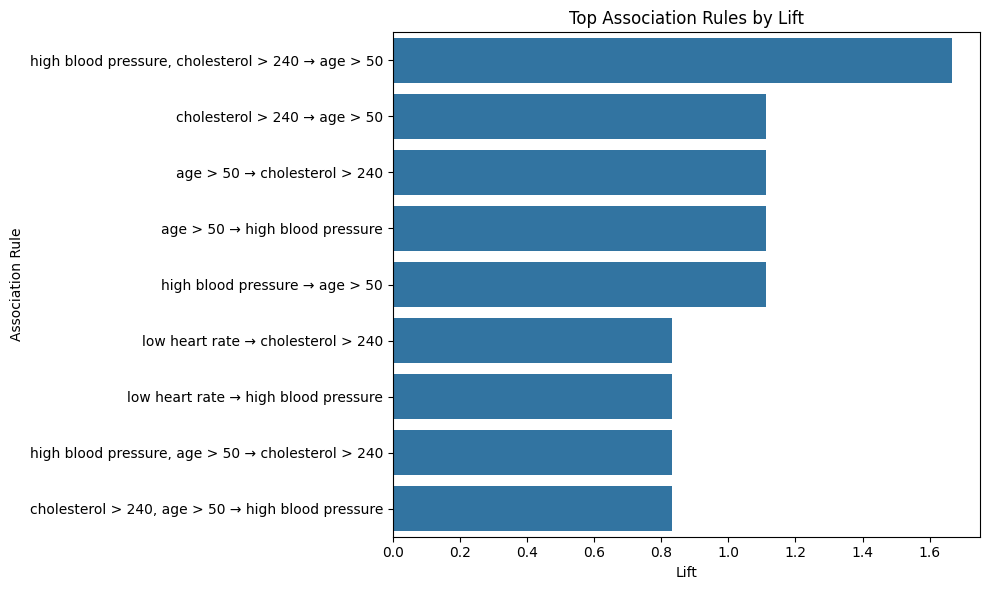

In [ ]:
# 📦 Import necessary libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🧾 Step 1: Define transaction data (example: health-related conditions)
transactions = [
    ['high blood pressure', 'cholesterol > 240', 'age > 50'],
    ['high blood pressure', 'low heart rate'],
    ['cholesterol > 240', 'age > 50'],
    ['high blood pressure', 'age > 50'],
    ['low heart rate', 'cholesterol > 240']
]

# 🔄 Step 2: Convert transactions to one-hot encoded format
te = TransactionEncoder()
df_trans = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# 🔍 Step 3: Generate frequent itemsets with Apriori
frequent_itemsets = apriori(df_trans, min_support=0.2, use_colnames=True)

# 🔗 Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# 🧠 Step 5: Display association rules
print("Association Rules:")
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 📊 Step 6: Visualize top rules by lift
if not rules.empty:
    top_rules = rules.sort_values('lift', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_rules['lift'],
        y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + ' → ' +
          top_rules['consequents'].apply(lambda x: ', '.join(list(x)))
    )
    plt.xlabel('Lift')
    plt.ylabel('Association Rule')
    plt.title('Top Association Rules by Lift')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No association rules found. Try lowering support or confidence thresholds.")
